<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Rizdha**
    
**Greetings from Chamdani**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div class="alert alert-info">
<b>Chamdani's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru dan kamu bisa mengirimkan project pada submission selanjutnya untuk mendapatkan jawaban / respon dari saya segera yaa

Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-success">
    
# General feedback v.1 *Project Accepted*

Terima kasih banyak telah mengirimkan proyek Anda! 
<br>
    
Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Semoga apa yang kamu pelajari dalam project ini dapat membantu meningkatkan kemampuanmu. Pertahankan apa yang sudah bagus, dan tingkatkan apa yang menurutmu masih perlu ditingkatkan. Semoga berhasil pada project selanjutnya yaa :)

**TETAP SEMANGAT!!**
    
</div>

# Deskripsi tugas

Perusahaan taksi bernama Sweet Lift telah mengumpulkan data historis tentang pesanan taksi di bandara. Untuk menarik lebih banyak pengemudi pada jam sibuk, perlu memprediksi jumlah pesanan taksi untuk satu jam berikutnya. Buat model untuk prediksi seperti itu.

Metrik RMSE pada *test set* tidak boleh lebih dari 48.

## Instruksi tugas

1. Unduh data dan lakukan *resampling* dalam satu jam.
2. Analisis datanya.
3.  Latih model yang berbeda dengan hiperparameter yang berbeda pula. Sampel tes harus 10% dari *dataset* awal.
4. Uji data menggunakan sampel tes dan berikan kesimpulan.

## Deskripsi data

Data tersimpan di file `taxi.csv`. Jumlah pesanan di kolom'*num_orders*'.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Persiapan

### Libraries

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

# stats library
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ml libraries
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
## XGBoost
from xgboost import XGBRegressor
## LightGBM
from lightgbm import LGBMRegressor
## CatBoost
from catboost import CatBoostRegressor

Matplotlib is building the font cache; this may take a moment.


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Loading Data

In [2]:
# `index_col=[0]` & `parse_dates=[0]` to use the first column as a datetime index
# If run locally
try:
    df = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])

# If run on the platform    
except:
    df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [6]:
# check if there are any missing values
df.isnull().sum()

num_orders    0
dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [7]:
# Resampling the data by the hour and totaling `num_orders` within the timeframe
df = df.resample('1H').sum()
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


- Dataset memiliki 26496 data
- Tidak ada missing values
- Dataset dikonversi dari raw data setiap 10 menit diresampling menjadi 1jam

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Analisis

### Make Features

In [8]:
def make_features(data, max_lag, rolling_mean_size):
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean()
    )


make_features(df, 5, 10)
df

,num_orders,month,day,hour,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,1,3,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,2,3,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,4,3,66.0,71.0,85.0,124.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,8,31,19,4,207.0,217.0,197.0,116.0,133.0,173.3
2018-08-31 20:00:00,154,8,31,20,4,136.0,207.0,217.0,197.0,116.0,166.6
2018-08-31 21:00:00,159,8,31,21,4,154.0,136.0,207.0,217.0,197.0,162.9


- Kita menambahkan 5 fitur lag, yang dibuat berdasarkan asumsi bahwa apa yang terjadi di masa lalu dapat memengaruhi atau berisi beberapa informasi intrinsik tentang masa depan.
- Membuat rolling 10 untuk menghitung statistik nilai dari sampel data tertentu dengan menentukan rentang yang mencakup model itu sendiri serta sejumlah bagian tertentu sebelum dan sesudah pemilihan digunakan.
- Menambahkan kolom seperti bulan, tanggal, dan jam untuk mengetahui kapan pemesanan taksi terjadi

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [9]:
# create new df without features
df_raw = df[['num_orders']]

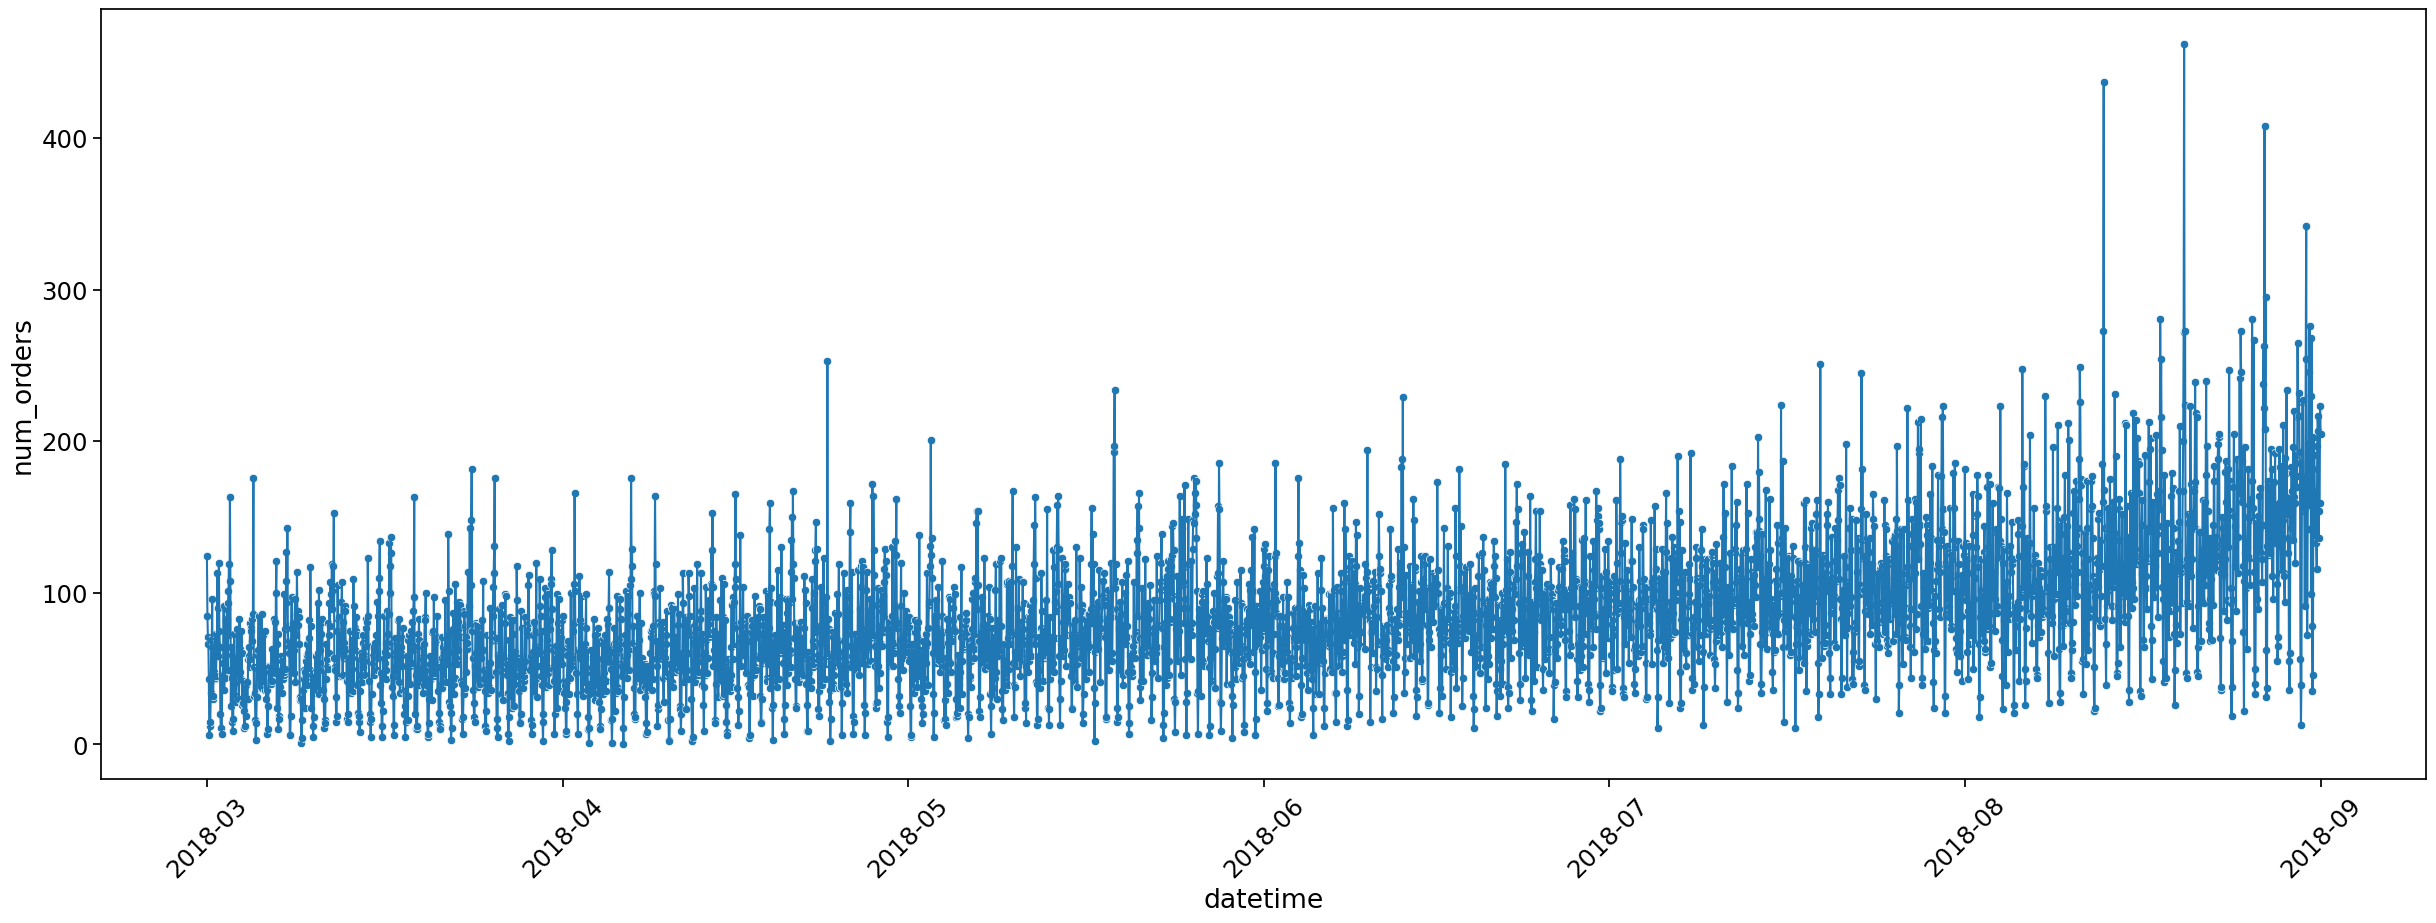

In [10]:
# Display the distribution of the number of taxi orders
plt.figure(figsize = (30,10))
sns.set_context(context='notebook', font_scale=1.6)
sns.scatterplot(x='datetime', y ='num_orders', data=df)
sns.lineplot(x='datetime', y='num_orders', data=df)
plt.xticks(rotation=45)
plt.show()

Berdasarkan diagram diatas, distribusi datanya tidak stasioner

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

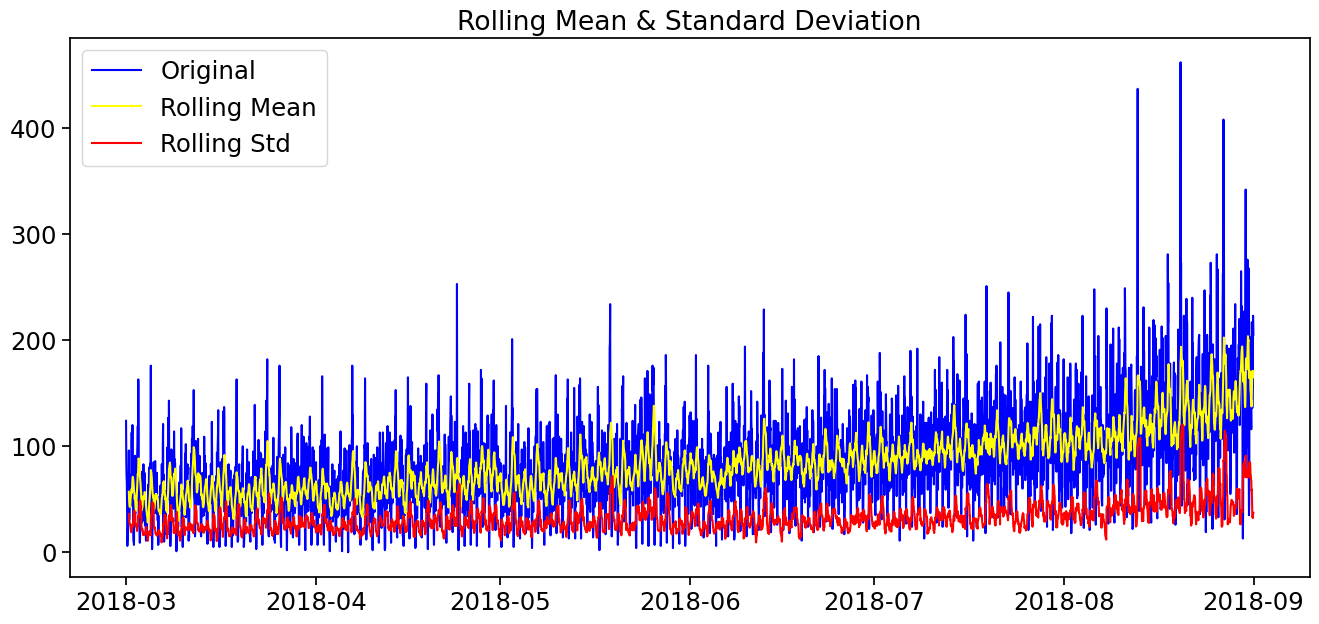

In [11]:
# display mean and standard deviation
rolLmean = df_raw.rolling(12).mean()
rolLstd = df_raw.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(df_raw, color='blue',label='Original')
mean = plt.plot(rolLmean, color='yellow', label='Rolling Mean')
std = plt.plot(rolLstd, color='red', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Karena banyaknya data maka cukup sulit bagi kita untuk melihat trend pada data tersebut, walaupun pada grafik diatas terlihat trendnya semakin meningkat kita akan memvisualisasikan data tersebut dengan metode seasonal decompose

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

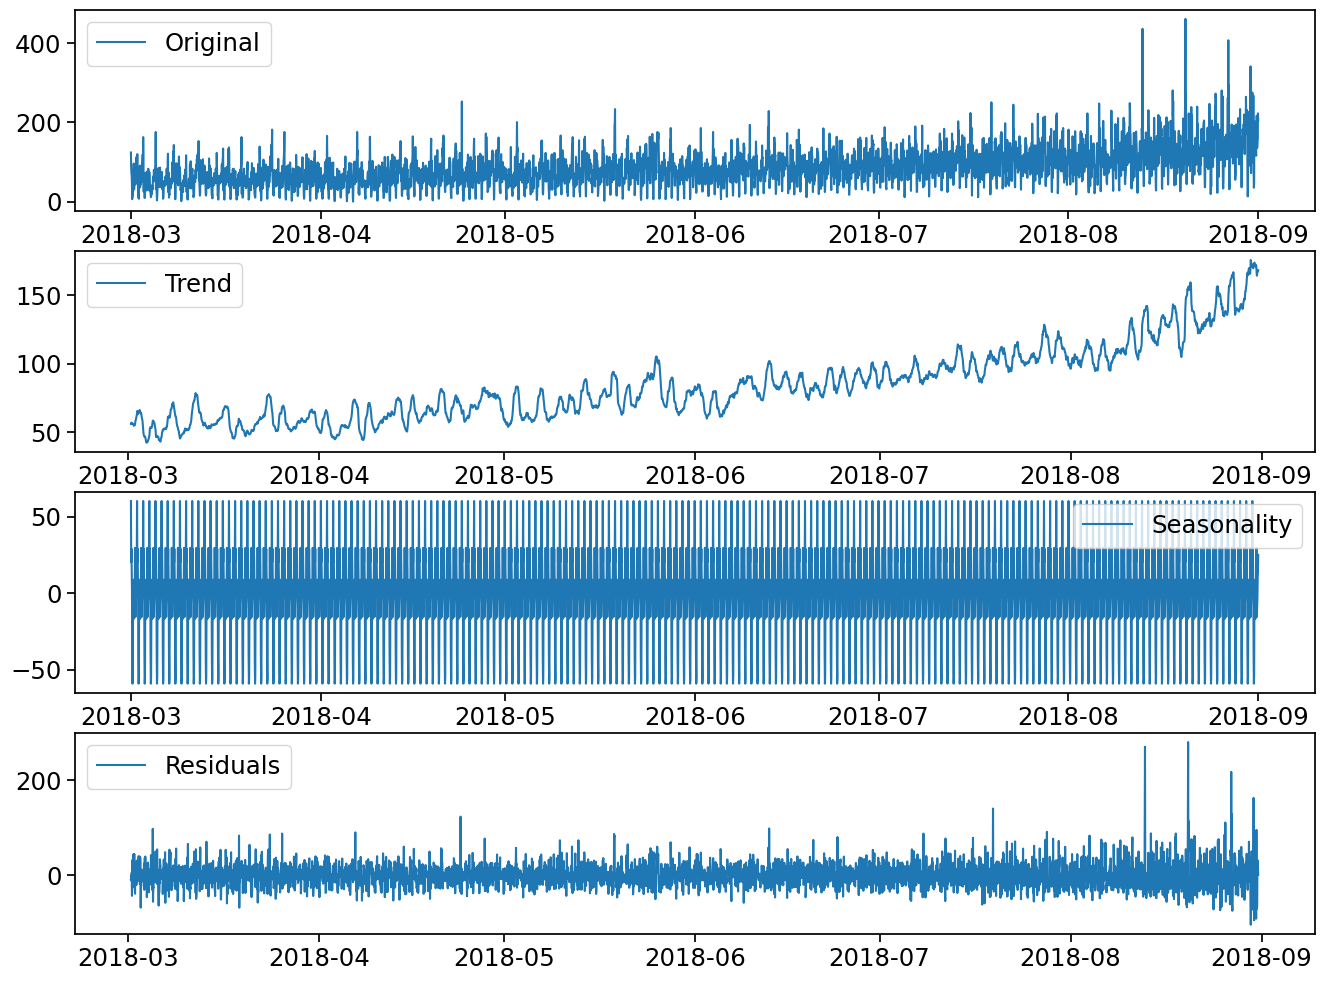

In [12]:
# display the data trend and seasonality

decomposition = seasonal_decompose(df_raw)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,12))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(df_raw, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()

Dari diagram di atas terlihat bahwa trend pemesanan taksi setiap bulannya mengalami peningkatan, meskipun pada bulan-bulan awal tidak terlalu signifikan.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

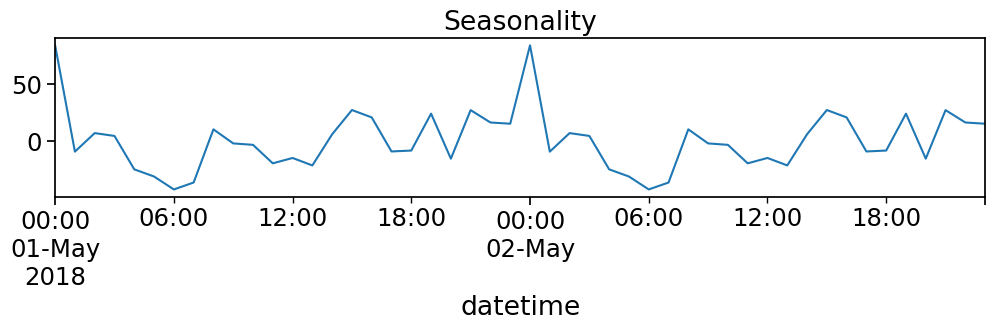

In [13]:
# resample and display the data seasonality in may
decomposed_resample = seasonal_decompose(df_raw['2018-05-01':'2018-05-02'])

plt.figure(figsize=(12, 7))
plt.subplot(312)
decomposed_resample.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.show()

Pemesanan puncak terjadi pada pukul 00:00 karena tengah malam, taxi adalah transportasi yang paling memungkinkan digunakan oleh penumpang, dan pemesanan paling sedikit pukul 6:00 karena aktivitas penerbangan biasanya dimulai, sehingga sedikit yang memesan taxi

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Pelatihan

### Splitting Data

Kita akan memisahkan data dengan rasio 90:10

In [14]:
# def rmse function
def rmse(y_actual, y_pred):

  return np.sqrt(mean_squared_error(y_actual, y_pred))

In [15]:
# shuffle=False to keep the data in chronological order
train, test = train_test_split(df, train_size=0.9, shuffle=False)
train = train.dropna()
# Checking set shapes and continuity
print('New set shapes:')
print('Training set:', train.shape)
print('Training set end date:', train.index.max())
print('Test set:', test.shape)
print('Training set start date:', test.index.min())


New set shapes:
Training set: (3964, 11)
Training set end date: 2018-08-13 13:00:00
Test set: (442, 11)
Training set start date: 2018-08-13 14:00:00


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Feature and target separation for new set

In [16]:
train_features = train.drop('num_orders', axis=1)
test_features = test.drop('num_orders', axis=1)

train_target = train['num_orders']
test_target = test['num_orders']

# Checking set shape
train_features.shape

(3964, 10)

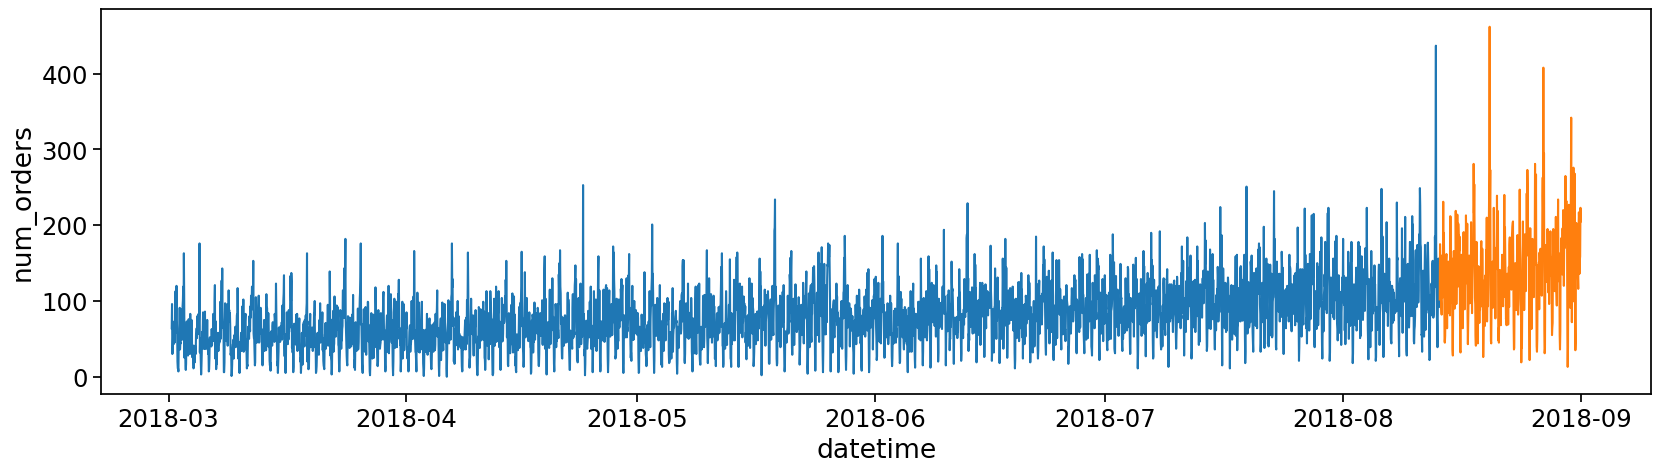

In [17]:
# display the distribution data train and test
plt.figure(figsize=(20,5))
sns.lineplot(train_features.index, train_target);
sns.lineplot(test_features.index, test_target);
plt.show()

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Sanity Check

Sebagai standar untuk model, kita dapat membuat prediksi tiruan tanpa machine learning dan mendapatkan skor RMSE-nya. Dua prediksi dummy yang dimaksud menggunakan median konstan dari keseluruhan rangkaian, sedangkan prediksi lainnya melibatkan pergeseran data sebanyak 1 satuan waktu.

In [18]:
# Median dummy prediction

## Creating an array of test set's shape filled with training set's median
pred = np.ones(test_target.shape) * train_target.median()

## Comparing the actual test target values with the dummy prediction
## and getting the RMSE score
RMSE = mean_squared_error(test_target, pred) ** 0.5
print('RMSE:', RMSE)

RMSE: 87.15277582981295


In [19]:
# Time shift dummy prediction

## Shifting the test set by 1 unit and storing it as dummy predictions
pred = test_target.shift(1)

## Filling the first row with previous value from training set
pred.iloc[0] = train_target.iloc[-1]

## Comparing the actual test target values with the dummy prediction
## and getting the RMSE score
RMSE = mean_squared_error(test_target, pred) ** 0.5
print('RMSE :', RMSE)

RMSE : 58.856486242815066


Model kita memiliki nilai RMSE terendah ~58, namun perusahaan Sweet Lift menginginkan nilai RMSE tidak boleh lebih dari 48

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Linear Regressor

In [20]:
# training the algorithm
lr = LinearRegression()  
lr.fit(train_features, train_target)
# linear regression model predict
pred_train_lr = lr.predict(train_features)
pred_test_lr = lr.predict(test_features)

print('RMSE Train :', rmse(train_target, pred_train_lr))
print('RMSE Test :', rmse(test_target, pred_test_lr))

RMSE Train : 30.49157375237362
RMSE Test : 53.10022806364769


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### ARIMA (Autoregressive Integrated Moving Average)

Model ini merupakan model yang berasal dari statsmodels dimana menggunakan p,d,q sebagai parameter Autoregresive, Integrated dan Moving Average. Dataset akan dipisah menjadi 90% train dan 10% test tanpa pengacakan, sedangkan parameter p,d,q kita kan peroleh dari kurva ACF dan PACF berikut.

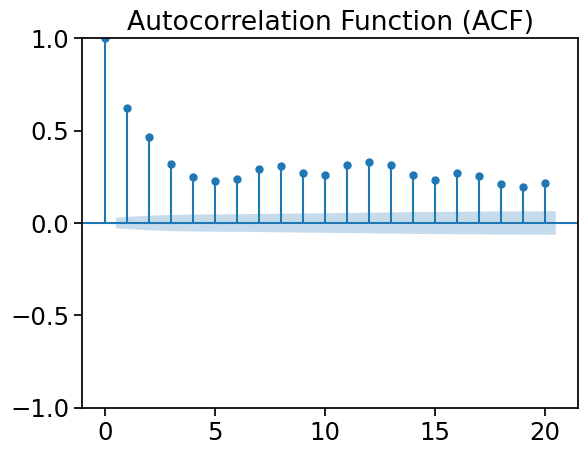

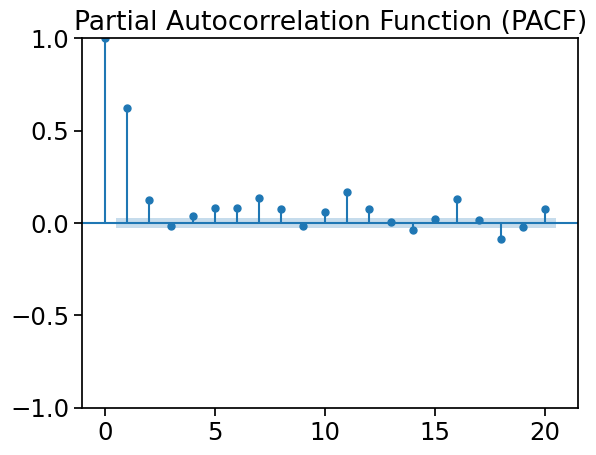

In [21]:
# Create ACF plot
plot_acf(df['num_orders'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Create PACF plot
plot_pacf(df['num_orders'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

Jika kita menentukan treshold sebesar 0.5, maka pada grafik ACF kita akan menjadikan q=2 dan dari grafik PACF kita akan menjadikan p=1. Selain itu kita akan menggunakan Integration dimana d=1. Maka parameter ARIMA akan menjadi seperti berikut.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [22]:
# create arime dataset
df_arima = df.copy()

# split dataset 10% for test
train, test = train_test_split(df_arima, test_size=0.1, shuffle=False)

# create arima model with p=1, d=1, q=2
arima_model = ARIMA(train.num_orders, order = (1,1,2)).fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                 3974
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -19261.181
Date:                Sun, 09 Jun 2024   AIC                          38530.363
Time:                        04:28:37   BIC                          38555.512
Sample:                    03-01-2018   HQIC                         38539.281
                         - 08-13-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4921      0.030     16.494      0.000       0.434       0.551
ma.L1         -1.0490      0.034    -31.267      0.000      -1.115      -0.983
ma.L2          0.0546      0.033      1.667      0.0

In [23]:
forecast_length = len(test)
arima_pred = arima_model.get_forecast(forecast_length).predicted_mean
arima_RMSE_raw = np.round(mean_squared_error(test_target,arima_pred,squared=False))
print('RMSE ARIMA:', arima_RMSE_raw)

RMSE ARIMA: 64.0


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Random Forest Regressor

In [24]:
# Creating variables to store best scores
rfr_best_train_score = 10000
rfr_best_test_score = 10000
rfr_best_model = None

# Increasing the number of estimators from 1 to 100 by 20 in each loop
for estimators in range(1, 101, 20):
    # Increasing the depth from 1 to 15 by 5 in each loop 
    for depth in range(1, 15, 5):
        # Creating instances of LGBMRegressor with varying hyperparameters
        rfr = RandomForestRegressor(n_estimators=estimators, max_depth=depth, random_state=12345)
        rfr.fit(train_features, train_target)
        trpred = rfr.predict(train_features)
        tepred = rfr.predict(test_features)
        
        rfr_train_score = (mse(train_target, trpred) ** 0.5)
        rfr_test_score = (mse(test_target, tepred) ** 0.5)
        
        # Storing best max_depth and scores
        if rfr_test_score < rfr_best_test_score:
            rfr_best_train_score = rfr_train_score
            rfr_best_test_score = rfr_test_score
            rfr_best_model = rfr
        
print('RMSE Train :', rfr_best_train_score)
print('RMSE Test :', rfr_best_test_score)
print('Best model & hyperparameters:', rfr_best_model)

RMSE Train : 13.559354707932481
RMSE Test : 46.80581641935878
Best model & hyperparameters: RandomForestRegressor(max_depth=11, n_estimators=41, random_state=12345)


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### XGBoost Regressor 

In [25]:
# Creating variables to store best scores
xgbr_best_train_score = 10000
xgbr_best_test_score = 10000
xgbr_best_model = None

# Increasing the number of estimators from 1 to 100 by 20 in each loop
for estimators in range(1, 101, 20):
    # Increasing the depth from 1 to 15 by 5 in each loop 
    for depth in range(1, 15, 5):
        # Creating instances of LGBMRegressor with varying hyperparameters
        xgbr = XGBRegressor(n_estimators=estimators, max_depth=depth, random_state=12345)
        xgbr.fit(train_features, train_target)
        trpred = xgbr.predict(train_features)
        tepred = xgbr.predict(test_features)
        
        xgbr_train_score = (mse(train_target, trpred) ** 0.5)
        xgbr_test_score = (mse(test_target, tepred) ** 0.5)
        
        # Storing best max_depth and scores
        if xgbr_test_score < xgbr_best_test_score:
            xgbr_best_train_score = xgbr_train_score
            xgbr_best_test_score = xgbr_test_score
            xgbr_best_model = xgbr
        
print('RMSE Train :', xgbr_best_train_score)
print('RMSE Test :', xgbr_best_test_score)
print('Best model & hyperparameters:', xgbr_best_model)

RMSE Train : 8.452459329801433
RMSE Test : 47.20032707812929
Best model & hyperparameters: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=81, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=12345,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### LightGBM Regressor

In [26]:
# Creating variables to store best scores
lgbmr_best_train_score = 10000
lgbmr_best_test_score = 10000
lgbmr_best_model = None

# Increasing the number of estimators from 1 to 100 by 20 in each loop
for estimators in range(1, 101, 20):
    # Increasing the depth from 1 to 15 by 5 in each loop 
    for depth in range(1, 15, 5):
        # Creating instances of LGBMRegressor with varying hyperparameters
        lgbmr = LGBMRegressor(n_estimators=estimators, max_depth=depth, random_state=12345)
        lgbmr.fit(train_features, train_target)
        trpred = lgbmr.predict(train_features)
        tepred = lgbmr.predict(test_features)
        
        lgbmr_train_score = (mse(train_target, trpred) ** 0.5)
        lgbmr_test_score = (mse(test_target, tepred) ** 0.5)
        
        # Storing best max_depth and scores
        if lgbmr_test_score < lgbmr_best_test_score:
            lgbmr_best_train_score = lgbmr_train_score
            lgbmr_best_test_score = lgbmr_test_score
            lgbmr_best_model = lgbmr
        
print('RMSE Train :', lgbmr_best_train_score)
print('RMSE Test :', lgbmr_best_test_score)
print('Best model & hyperparameters:', lgbmr_best_model)

RMSE Train : 16.829501092402776
RMSE Test : 43.25398692647042
Best model & hyperparameters: LGBMRegressor(max_depth=6, n_estimators=81, random_state=12345)


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### CatBoost Regressor

In [27]:
# Creating variables to store best scores
cbr_best_depth = 10000
cbr_best_train_score = 10000
cbr_best_test_score = 10000
cbr_best_model = None

# Increasing the number of estimators from 1 to 100 by 20 in each loop
for estimators in range(1, 101, 10):
    # Increasing the depth from 1 to 15 by 5 in each loop 
    for depth in range(1, 15, 5):
        # Creating instances of LGBMRegressor with varying hyperparameters
        cbr = CatBoostRegressor(n_estimators=estimators, max_depth=depth, random_state=12345)
        cbr.fit(train_features, train_target)
        trpred = cbr.predict(train_features)
        tepred = cbr.predict(test_features)
        
        cbr_train_score = (mse(train_target, trpred) ** 0.5)
        cbr_test_score = (mse(test_target, tepred) ** 0.5)
        
        # Storing best max_depth and scores
        if cbr_test_score < cbr_best_test_score:
            cbr_best_train_score = cbr_train_score
            cbr_best_test_score = cbr_test_score
            cbr_best_model = cbr
        
print('RMSE Train :', cbr_best_train_score)
print('RMSE Test :', cbr_best_test_score)
print('Best model & hyperparameters:', cbr_best_model)

Learning rate set to 0.5
0:	learn: 35.5357675	total: 46.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 30.0514904	total: 3.95ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 30.4639367	total: 53.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 35.5357675	total: 774us	remaining: 7.75ms
1:	learn: 33.9021579	total: 1.47ms	remaining: 6.62ms
2:	learn: 32.5565439	total: 2.09ms	remaining: 5.56ms
3:	learn: 31.6973471	total: 2.68ms	remaining: 4.68ms
4:	learn: 30.9492510	total: 3.26ms	remaining: 3.91ms
5:	learn: 30.3812881	total: 3.82ms	remaining: 3.18ms
6:	learn: 29.8829763	total: 4.43ms	remaining: 2.53ms
7:	learn: 29.4640288	total: 5.06ms	remaining: 1.9ms
8:	learn: 29.1649257	total: 5.64ms	remaining: 1.25ms
9:	learn: 28.9081985	total: 6.21ms	remaining: 621us
10:	learn: 28.5706345	total: 6.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 30.0514904	total: 3.69ms	remaining: 36.9ms
1:	learn: 26.9378175	total: 79.5ms	remaining: 358ms
2:	learn: 25.4211259	total: 83ms	remaining:

Learning rate set to 0.5
0:	learn: 30.4639367	total: 81.2ms	remaining: 2.44s
1:	learn: 26.3753862	total: 185ms	remaining: 2.68s
2:	learn: 23.7034792	total: 287ms	remaining: 2.68s
3:	learn: 22.3133084	total: 382ms	remaining: 2.58s
4:	learn: 21.5503016	total: 486ms	remaining: 2.53s
5:	learn: 20.8186927	total: 601ms	remaining: 2.5s
6:	learn: 20.7704382	total: 603ms	remaining: 2.07s
7:	learn: 19.9327691	total: 706ms	remaining: 2.03s
8:	learn: 19.6861523	total: 806ms	remaining: 1.97s
9:	learn: 19.6303726	total: 809ms	remaining: 1.7s
10:	learn: 19.2088922	total: 905ms	remaining: 1.65s
11:	learn: 18.7383700	total: 1.01s	remaining: 1.59s
12:	learn: 18.7023922	total: 1.01s	remaining: 1.4s
13:	learn: 18.4106490	total: 1.11s	remaining: 1.35s
14:	learn: 18.1835337	total: 1.21s	remaining: 1.29s
15:	learn: 17.6617398	total: 1.31s	remaining: 1.23s
16:	learn: 17.4508888	total: 1.47s	remaining: 1.21s
17:	learn: 17.0330935	total: 1.58s	remaining: 1.14s
18:	learn: 16.8194472	total: 1.67s	remaining: 1.06s

11:	learn: 28.3007462	total: 7.61ms	remaining: 24.7ms
12:	learn: 28.0251381	total: 8.24ms	remaining: 24.1ms
13:	learn: 27.8422183	total: 8.95ms	remaining: 23.7ms
14:	learn: 27.6113730	total: 9.69ms	remaining: 23.2ms
15:	learn: 27.5167754	total: 10.4ms	remaining: 22.7ms
16:	learn: 27.4431281	total: 11.1ms	remaining: 22.2ms
17:	learn: 27.2761195	total: 11.8ms	remaining: 21.6ms
18:	learn: 27.1265736	total: 12.4ms	remaining: 20.8ms
19:	learn: 27.0047058	total: 13ms	remaining: 20.1ms
20:	learn: 26.9005943	total: 13.6ms	remaining: 19.4ms
21:	learn: 26.7574665	total: 14.2ms	remaining: 18.7ms
22:	learn: 26.6482756	total: 14.8ms	remaining: 18ms
23:	learn: 26.5347309	total: 15.5ms	remaining: 17.4ms
24:	learn: 26.4350135	total: 16ms	remaining: 16.7ms
25:	learn: 26.3867401	total: 16.6ms	remaining: 16ms
26:	learn: 26.3007173	total: 17.2ms	remaining: 15.3ms
27:	learn: 26.2171824	total: 17.8ms	remaining: 14.6ms
28:	learn: 26.1490818	total: 18.4ms	remaining: 14ms
29:	learn: 26.0702780	total: 19ms	rema

8:	learn: 23.0347195	total: 26.5ms	remaining: 153ms
9:	learn: 22.4466531	total: 29.7ms	remaining: 152ms
10:	learn: 22.2895105	total: 32.5ms	remaining: 148ms
11:	learn: 22.1449404	total: 34.4ms	remaining: 140ms
12:	learn: 21.7135233	total: 37.8ms	remaining: 139ms
13:	learn: 21.4478755	total: 41ms	remaining: 138ms
14:	learn: 21.2054301	total: 44.2ms	remaining: 136ms
15:	learn: 20.8947877	total: 47.4ms	remaining: 133ms
16:	learn: 20.6277949	total: 50.8ms	remaining: 131ms
17:	learn: 20.5452534	total: 53.8ms	remaining: 129ms
18:	learn: 20.3710891	total: 57.3ms	remaining: 127ms
19:	learn: 20.3046351	total: 60.5ms	remaining: 124ms
20:	learn: 20.1464597	total: 63.7ms	remaining: 121ms
21:	learn: 19.9340223	total: 67ms	remaining: 119ms
22:	learn: 19.7861332	total: 70.1ms	remaining: 116ms
23:	learn: 19.5727362	total: 73.3ms	remaining: 113ms
24:	learn: 19.4823480	total: 76.5ms	remaining: 110ms
25:	learn: 19.3136969	total: 79.7ms	remaining: 107ms
26:	learn: 19.0644243	total: 82.9ms	remaining: 104ms

Learning rate set to 0.437131
0:	learn: 30.9278236	total: 3.53ms	remaining: 247ms
1:	learn: 27.7406631	total: 6.39ms	remaining: 220ms
2:	learn: 26.0155870	total: 9.3ms	remaining: 211ms
3:	learn: 25.1568701	total: 12.2ms	remaining: 205ms
4:	learn: 24.5965913	total: 15ms	remaining: 198ms
5:	learn: 24.1501023	total: 17.8ms	remaining: 193ms
6:	learn: 23.7050735	total: 20.7ms	remaining: 189ms
7:	learn: 23.6165441	total: 23.4ms	remaining: 185ms
8:	learn: 23.3324870	total: 26.2ms	remaining: 180ms
9:	learn: 22.6458335	total: 29ms	remaining: 177ms
10:	learn: 22.5158426	total: 32.1ms	remaining: 175ms
11:	learn: 22.4179326	total: 35ms	remaining: 172ms
12:	learn: 22.2410170	total: 38.5ms	remaining: 172ms
13:	learn: 22.1596990	total: 41.6ms	remaining: 169ms
14:	learn: 21.9096373	total: 44.8ms	remaining: 167ms
15:	learn: 21.6950959	total: 48.1ms	remaining: 165ms
16:	learn: 21.5559861	total: 51.5ms	remaining: 163ms
17:	learn: 21.3361067	total: 54.4ms	remaining: 160ms
18:	learn: 21.1803586	total: 57.8

5:	learn: 24.1535843	total: 19ms	remaining: 238ms
6:	learn: 23.7187863	total: 22.5ms	remaining: 238ms
7:	learn: 23.3971321	total: 25.4ms	remaining: 232ms
8:	learn: 23.2390132	total: 28.1ms	remaining: 225ms
9:	learn: 22.6493089	total: 30.9ms	remaining: 219ms
10:	learn: 22.5449496	total: 33.6ms	remaining: 214ms
11:	learn: 22.4450442	total: 36.3ms	remaining: 209ms
12:	learn: 22.4039526	total: 38.9ms	remaining: 204ms
13:	learn: 22.3120266	total: 41.7ms	remaining: 200ms
14:	learn: 22.0946945	total: 44.6ms	remaining: 196ms
15:	learn: 22.0177462	total: 47.3ms	remaining: 192ms
16:	learn: 21.9399321	total: 50ms	remaining: 188ms
17:	learn: 21.6557115	total: 52.9ms	remaining: 185ms
18:	learn: 21.5874156	total: 55.7ms	remaining: 182ms
19:	learn: 21.4384700	total: 58.5ms	remaining: 178ms
20:	learn: 21.3439423	total: 61.2ms	remaining: 175ms
21:	learn: 21.1706202	total: 64ms	remaining: 172ms
22:	learn: 20.9643393	total: 66.9ms	remaining: 169ms
23:	learn: 20.8020542	total: 69.7ms	remaining: 166ms
24:	

Learning rate set to 0.35726
0:	learn: 32.1415072	total: 3.18ms	remaining: 286ms
1:	learn: 29.0165297	total: 6.12ms	remaining: 272ms
2:	learn: 27.2699958	total: 8.93ms	remaining: 262ms
3:	learn: 25.8835936	total: 11.9ms	remaining: 259ms
4:	learn: 25.1681503	total: 14.8ms	remaining: 255ms
5:	learn: 24.6610014	total: 17.7ms	remaining: 251ms
6:	learn: 24.1921340	total: 20.5ms	remaining: 246ms
7:	learn: 23.9598541	total: 23.3ms	remaining: 242ms
8:	learn: 23.5491089	total: 26.2ms	remaining: 239ms
9:	learn: 23.4819454	total: 29ms	remaining: 235ms
10:	learn: 23.4450848	total: 30.8ms	remaining: 224ms
11:	learn: 23.1920752	total: 33.7ms	remaining: 222ms
12:	learn: 22.7493982	total: 36.7ms	remaining: 220ms
13:	learn: 22.3119758	total: 39.6ms	remaining: 218ms
14:	learn: 22.0109225	total: 42.7ms	remaining: 216ms
15:	learn: 21.9722091	total: 43.8ms	remaining: 205ms
16:	learn: 21.7186712	total: 46.6ms	remaining: 203ms
17:	learn: 21.6128042	total: 49.4ms	remaining: 200ms
18:	learn: 21.5652343	total: 

70:	learn: 8.5967767	total: 3.32s	remaining: 935ms
71:	learn: 8.4433015	total: 3.37s	remaining: 890ms
72:	learn: 8.3945109	total: 3.42s	remaining: 843ms
73:	learn: 8.2528344	total: 3.47s	remaining: 797ms
74:	learn: 8.1336041	total: 3.51s	remaining: 750ms
75:	learn: 8.0913650	total: 3.57s	remaining: 704ms
76:	learn: 8.0504191	total: 3.61s	remaining: 657ms
77:	learn: 7.8709753	total: 3.66s	remaining: 610ms
78:	learn: 7.7462370	total: 3.71s	remaining: 563ms
79:	learn: 7.6758282	total: 3.76s	remaining: 516ms
80:	learn: 7.5792418	total: 3.8s	remaining: 469ms
81:	learn: 7.4879992	total: 3.86s	remaining: 423ms
82:	learn: 7.3401410	total: 3.91s	remaining: 377ms
83:	learn: 7.2768130	total: 3.95s	remaining: 329ms
84:	learn: 7.2150877	total: 4s	remaining: 282ms
85:	learn: 7.1056659	total: 4.05s	remaining: 235ms
86:	learn: 6.9858492	total: 4.1s	remaining: 188ms
87:	learn: 6.9844756	total: 4.15s	remaining: 141ms
88:	learn: 6.9564059	total: 4.24s	remaining: 95.3ms
89:	learn: 6.8903163	total: 4.29s	r

In [28]:
cbr_best_model.get_params()

{'loss_function': 'RMSE',
 'max_depth': 6,
 'n_estimators': 51,
 'random_state': 12345}

Berdasarkan semua model yang telah kita latih, CatBoost regressor merupakan model yang menghasilkan nilai RMSE terbaik 42.12, hanya selisih sedikit dengan LightGBM regressor 43.25. Kita akan menggunakan model LightGBM regressor untuk kita lakukan pengujian dengan hyperparameter (max_depth=6, n_estimators=51, random_state=12345)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Pengujian

In [29]:
# Evaluate the best model
cbr = CatBoostRegressor(n_estimators=51, max_depth=6, random_state=12345)
cbr.fit(train_features, train_target)
trpred = cbr.predict(train_features)
tepred = cbr.predict(test_features)

cbr_pred = pd.DataFrame(tepred)
cbr_pred.index = test_target.index

rmse(train_target, trpred), rmse(test_target, tepred)

Learning rate set to 0.5
0:	learn: 30.0514904	total: 3.26ms	remaining: 163ms
1:	learn: 26.9378175	total: 6.39ms	remaining: 157ms
2:	learn: 25.4211259	total: 9.26ms	remaining: 148ms
3:	learn: 24.7306155	total: 12ms	remaining: 141ms
4:	learn: 24.2977231	total: 14.9ms	remaining: 137ms
5:	learn: 23.8706742	total: 17.7ms	remaining: 133ms
6:	learn: 23.2652813	total: 20.5ms	remaining: 129ms
7:	learn: 23.1283106	total: 23.2ms	remaining: 125ms
8:	learn: 22.9810184	total: 26ms	remaining: 121ms
9:	learn: 22.5972245	total: 28.9ms	remaining: 119ms
10:	learn: 22.4461847	total: 31.6ms	remaining: 115ms
11:	learn: 22.2576224	total: 34.5ms	remaining: 112ms
12:	learn: 22.0894806	total: 37.7ms	remaining: 110ms
13:	learn: 21.5974489	total: 40.6ms	remaining: 107ms
14:	learn: 21.4051048	total: 43.4ms	remaining: 104ms
15:	learn: 21.3282408	total: 46.2ms	remaining: 101ms
16:	learn: 21.0836998	total: 49ms	remaining: 97.9ms
17:	learn: 20.9261543	total: 51.7ms	remaining: 94.7ms
18:	learn: 20.5754334	total: 54.5ms

(16.673497447342, 42.12046850425953)

In [30]:
# create new Catboost prediction dataset
result_cbr = pd.concat([test_target, cbr_pred], axis=1).reindex(test_target.index)
result_cbr.head()

,num_orders,0
datetime,,
2018-08-13 14:00:00,102,96.463813
2018-08-13 15:00:00,175,126.508418
2018-08-13 16:00:00,144,119.358153
2018-08-13 17:00:00,152,121.363328
2018-08-13 18:00:00,104,112.392248


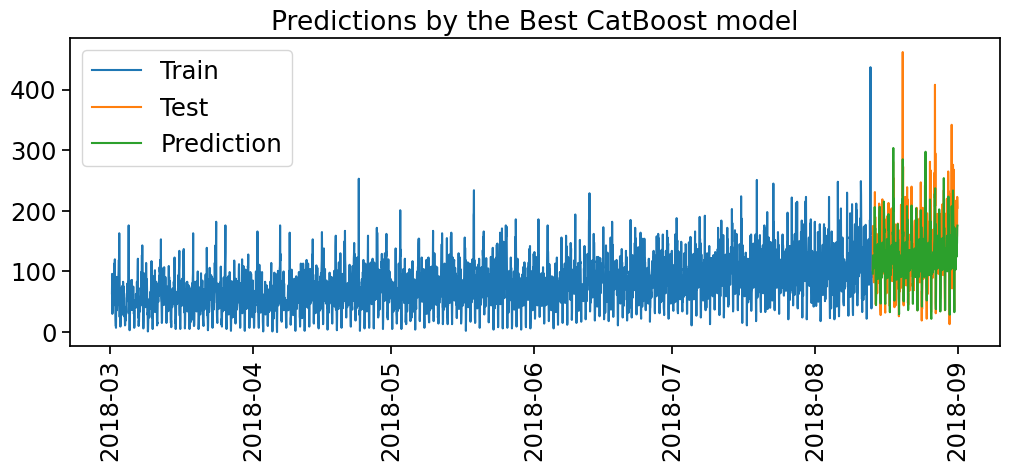

In [31]:
# display Catboost predictions plot
plt.figure(figsize=(12,4))
plt.plot(train_target.index, train_target, label='Train')
plt.plot(test_target.index, test_target, label='Test')
plt.plot(result_cbr.index, result_cbr[0], label='Prediction')
plt.xticks(rotation='vertical')
plt.legend(loc='best')
plt.title('Predictions by the Best CatBoost model')
plt.show()

- Dari grafik diatas kita dapat melihat hasil prediksi model Catboost dengan parameter terbaik yang kita peroleh, terlihat bahwa hasil prediksi tersebut cukup mendekati pola data sebenarnya.
- Dengan hasil dari model ini diharapkan dapat kita andalkan untuk membantu perusahaan dalam melakukan prediksi untuk menentukan jumlah pemesanan taksi yang akan terjadi di masa yang akan datang.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Kesimpulan

- Tidak ada data yang hilang pada dataset, dan tidak ada outlier juga
- Melakukan resampling waktu dari yang awalnya 10menit menjadi 1jam
- Distribusi data pada dataset tidak stasioner
- Trend data cenderung naik tiap bulannya
- Membagi dataset menjadi features dan target dengan rasio 90:10
- Melakukan pelatihan beberapa model untuk mendapatkan model yang terbaik
- Model yang dilatih adalah Linear regression, ARIMA, Random forest, xgboost, lightgbm, dan catboost
- Catboost merupakan model yang dipilih karena menghasilkan nilai RMSE yang paling kecil yakni 42.12 dengan hyperparameter (max_depth=6, n_estimators=51, random_state=12345)
- Hasil prediksi dari model cukup memuaskan karena memiliki pola yang mirip dengan data aslinya

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

# Daftar Periksa Penilaian

- [x]  Jupyter Notebook bisa dibuka.
- [ ]  Tidak ada kesalahan dalam kode
- [ ]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi.
- [ ]  Data telah diunduh dan disiapkan
- [ ]  Data telah dianalisis
- [ ]  Model sudah dilatih dan hiperparameter sudah dipilih
- [ ]  Model sudah dievaluasi. Kesimpulan sudah ada.
- [ ] *RMSE* untuk *test set* tidak lebih dari 48